In [227]:
pip install duckdb


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [228]:
#imports
import duckdb
import warnings
import pandas as pd

In [229]:
#Settings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [230]:
# create a connection to a file called 'database.db'
con = duckdb.connect('database.db')

In [231]:
#describe podcasts table
con.sql("describe podcasts")

┌────────────────┬─────────────┬─────────┬─────────┬─────────┬───────┐
│  column_name   │ column_type │  null   │   key   │ default │ extra │
│    varchar     │   varchar   │ varchar │ varchar │ varchar │ int32 │
├────────────────┼─────────────┼─────────┼─────────┼─────────┼───────┤
│ podcast_id     │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ itunes_id      │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ slug           │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ itunes_url     │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ title          │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ author         │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ description    │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ average_rating │ DOUBLE      │ YES     │ NULL    │ NULL    │  NULL │
│ ratings_count  │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ scraped_at     │ TIMESTAMP   │ YES     │ NULL    │ NULL    │  NULL │
├─────

In [232]:
#describe categories table
con.sql("describe categories")

┌─────────────┬─────────────┬─────────┬─────────┬─────────┬───────┐
│ column_name │ column_type │  null   │   key   │ default │ extra │
│   varchar   │   varchar   │ varchar │ varchar │ varchar │ int32 │
├─────────────┼─────────────┼─────────┼─────────┼─────────┼───────┤
│ podcast_id  │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ itunes_id   │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ category    │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
└─────────────┴─────────────┴─────────┴─────────┴─────────┴───────┘

In [233]:
#describe reviews table
con.sql("describe reviews")


┌─────────────┬──────────────────────────┬─────────┬─────────┬─────────┬───────┐
│ column_name │       column_type        │  null   │   key   │ default │ extra │
│   varchar   │         varchar          │ varchar │ varchar │ varchar │ int32 │
├─────────────┼──────────────────────────┼─────────┼─────────┼─────────┼───────┤
│ podcast_id  │ VARCHAR                  │ YES     │ NULL    │ NULL    │  NULL │
│ title       │ VARCHAR                  │ YES     │ NULL    │ NULL    │  NULL │
│ content     │ VARCHAR                  │ YES     │ NULL    │ NULL    │  NULL │
│ rating      │ INTEGER                  │ YES     │ NULL    │ NULL    │  NULL │
│ author_id   │ VARCHAR                  │ YES     │ NULL    │ NULL    │  NULL │
│ created_at  │ TIMESTAMP WITH TIME ZONE │ YES     │ NULL    │ NULL    │  NULL │
└─────────────┴──────────────────────────┴─────────┴─────────┴─────────┴───────┘

In [234]:
#Look into data for reviews
con.sql("select * from reviews limit 5")

┌──────────────────────┬──────────────────────┬──────────────────────┬────────┬─────────────────┬──────────────────────┐
│      podcast_id      │        title         │       content        │ rating │    author_id    │      created_at      │
│       varchar        │       varchar        │       varchar        │ int32  │     varchar     │ timestamp with tim…  │
├──────────────────────┼──────────────────────┼──────────────────────┼────────┼─────────────────┼──────────────────────┤
│ 52e3d2c4fab4e80a8b…  │ Argh                 │ What the heck is t…  │      1 │ a23655ce5565f32 │ 2019-04-30 21:24:0…  │
│ 52e3d2c4fab4e80a8b…  │ Miss gross overrat…  │ The Howard stern i…  │      1 │ e5d461c5f91c8d2 │ 2019-06-07 10:25:3…  │
│ 52e3d2c4fab4e80a8b…  │ I love Terri and F…  │ People get really …  │      5 │ 806cc75442c8f3d │ 2019-05-15 05:42:5…  │
│ 52e3d2c4fab4e80a8b…  │ Fresh Air subscrip…  │ I’ve been a subscr…  │      4 │ 3e1e7e8417a3e85 │ 2019-05-05 22:39:1…  │
│ 52e3d2c4fab4e80a8b…  │ Climate

In [235]:
#Total Number of reviews
con.sql("select count(*) as total_number_of_reviews from reviews")

┌─────────────────────────┐
│ total_number_of_reviews │
│          int64          │
├─────────────────────────┤
│                 5607021 │
└─────────────────────────┘

In [236]:
#Unique authors contributing reviews
con.sql("select count(DISTINCT author_id) as unique_authors from reviews")

┌────────────────┐
│ unique_authors │
│     int64      │
├────────────────┤
│        3256501 │
└────────────────┘

In [237]:
authors = con.sql("select author_id,count(author_id) as count from reviews group by author_id")
authors

┌─────────────────┬───────┐
│    author_id    │ count │
│     varchar     │ int64 │
├─────────────────┼───────┤
│ 0191ff7c2fec960 │     2 │
│ 6d86e0eb671e609 │     2 │
│ d4fbc58a8923fcd │     2 │
│ 79ddba0f22f9f09 │     1 │
│ ad1ba31f2d78961 │     2 │
│ 211661217ba3b4a │     1 │
│ 48b1335b6526740 │     1 │
│ cc715dc933f22a3 │     2 │
│ f23a717c03e4c3b │     4 │
│ a8e7d5c946257f1 │     1 │
│        ·        │     · │
│        ·        │     · │
│        ·        │     · │
│ d8694d93cc91916 │     1 │
│ 4c26227c03bebc9 │     1 │
│ 0a89a585902fde4 │     1 │
│ 39e593a515bea95 │    14 │
│ e34f58ce5cb9071 │     1 │
│ 33b066e71e6185c │    14 │
│ f30ebf73ea5778a │     7 │
│ ac0f589b36c8c5e │     3 │
│ 94c273f5ca60fe5 │     3 │
│ 76d0776621481a5 │     4 │
├─────────────────┴───────┤
│ ? rows        2 columns │
└─────────────────────────┘

In [238]:
#Top 5 authors
authors.df().sort_values('count',ascending=False).head(5)

,author_id,count
3047302,d3307adeffa285c,1681
3235255,791f376aca3c08d,1303
2552726,8ea31f030185a88,1248
218759,96a3f0358e7808d,1229
1037264,04c3b6defe22fb1,1094


In [239]:
#Bottom 5 authors
authors.df().sort_values('count',ascending=True).head(5)

,author_id,count
1628250,f5be2894c78a370,1
1996994,4432f7ddd102128,1
1996995,f41a37a7a4c1d0d,1
1996997,ab9e12475c83990,1
1996999,365622517a65895,1


In [240]:
#Look into data for reviews that have an average rating
rated_podcasts = con.sql("select podcast_id,author,title,average_rating,ratings_count from podcasts where average_rating >= 0")
rated_podcasts

┌──────────────────────┬──────────────────────┬───────────────────────────────────────┬────────────────┬───────────────┐
│      podcast_id      │        author        │                 title                 │ average_rating │ ratings_count │
│       varchar        │       varchar        │                varchar                │     double     │    varchar    │
├──────────────────────┼──────────────────────┼───────────────────────────────────────┼────────────────┼───────────────┤
│ f201172864310534ae…  │ noreply@blogger.co…  │ Rahdo Talks Through                   │            4.6 │ 60            │
│ 3cfef94cfccf27eb50…  │ CityPodcast          │ OriginALL                             │            3.7 │ 3             │
│ 2f2205dcc248024b0a…  │ PodcastOne           │ The Big Podcast With Shaq             │            4.6 │ 1.3K          │
│ 9fc35a81647e391f93…  │ Jim Kettner, John …  │ Galaktacus                            │            5.0 │ 20            │
│ ce2c3a68dda3560067…  │ Kris Ba

In [241]:
rated_podcasts = con.sql("select podcast_id,author,title,average_rating,ratings_count from podcasts where average_rating >= 0")
total_podcast_ratings = 0
rated_podcasts_df = rated_podcasts.df()
podcast_ratings = []
for (colname,colval) in rated_podcasts_df.iteritems():
    if colname == "ratings_count":
        for x in colval:
            if  "K" not in x:
                total_podcast_ratings += int(x)
                podcast_ratings.append(int(x))
            else:
                formatted = float(x[0:x.find('K')])
                total_podcast_ratings += (1000 * formatted)   
                podcast_ratings.append(int(1000 * formatted))
rated_podcasts_df.drop("ratings_count", axis = 1, inplace = True)
rated_podcasts_df["ratings_count"] = podcast_ratings

In [242]:
#First five values in rated podcasts data frame
rated_podcasts_df.head()


,podcast_id,author,title,average_rating,ratings_count
0,f201172864310534ae6b6c4f8ae9b8cc,noreply@blogger.com (Richard Ham),Rahdo Talks Through,4.6,60
1,3cfef94cfccf27eb504bd7a6c7459636,CityPodcast,OriginALL,3.7,3
2,2f2205dcc248024b0a3be4665f38e33a,PodcastOne,The Big Podcast With Shaq,4.6,1300
3,9fc35a81647e391f93211b5d11973c83,"Jim Kettner, John Mihaly, and Scott Brown",Galaktacus,5.0,20
4,ce2c3a68dda35600671acd32a1c15fc5,Kris Baker Dersch,No Extra Words one person's search for story,5.0,11


In [243]:
#Most rated podcasts
rated_podcasts_df.sort_values('ratings_count',ascending=False).head(5)

,podcast_id,author,title,average_rating,ratings_count
6022,608c549bece62f009d74396cacbb54c3,Barstool Sports,Pardon My Take,4.9,56000
12424,71819bcee712a1ad4aaa97fb8f1a5f09,Crooked Media,Pod Save America,4.7,51000
57663,57008fd80e7d710ac9283f3e64e9c9a7,iHeartRadio,Stuff You Should Know,4.6,39000
12588,de8caf3e4e8178b0280a52c7b3d51486,James Pietragallo & Jimmie Whisman,Small Town Murder,4.9,31000
14355,e50884ba76af05b03683b693e2b3e8f7,NPR,Wait Wait...Don't Tell Me!,4.7,21000


In [244]:
#Podcasts with top 5 average rating
rated_podcasts_df.sort_values('average_rating',ascending=False).head(5)

,podcast_id,author,title,average_rating,ratings_count
41494,134a2d138569aec6b59dcf0b8ee4fb72,"Alberto Barrera, Fofo Rivera, Abe Estrada",Cerealcast,5.0,1
42157,c020d87fec92abe047e6b392e4e74e6b,Global Denmark,Global Denmark Podcast,5.0,9
40733,e00550eb3fe66294b4e1f78ab9d2bc6d,Gayle Martin,Faking It: An SFX Podcast,5.0,4
73774,239d9a6b1de44631a6a23122a7f956d5,"Ian Broyles, Jonathan Wiley",NSVille,5.0,3
40735,66c41ef09462ddc13a76b31a81f977bd,underthefirstfloor,Under The First Floor,5.0,5


In [245]:
#Top rated podcasts with most ratings
rated_podcasts_df.sort_values(['average_rating', 'ratings_count'],
              ascending = [False, False]).head(5)

,podcast_id,author,title,average_rating,ratings_count
41479,2cb1f92d25e260d43d7c7131b78151e6,Barstool Sports,The Corp,5.0,9300
51386,e2bd23c58ea63ca8c8c6f6626fa438ca,Ramble,The TryPod,5.0,8500
72481,dc70a11a1927080ebab98be779ca4322,Jason DeFillippo & Brian Schulmeister,Grumpy Old Geeks,5.0,6300
25308,a066be63e15cb4125eb83d4f72f855eb,WNYC Studios and Complexly,The Anthropocene Reviewed,5.0,4100
51435,6bd787536fb3505dc3c6e091829bfa98,MeatEater,Cal's Week in Review,5.0,4000


In [246]:
con.sql("select * from categories").df().head(5)

,podcast_id,itunes_id,category
0,943d1c4349913bde09ef82b69f83cfdf,1446474395,education
1,f53f27d03cdc5040ab4fd2ea30e3dd4f,840646770,society-culture
2,49fa5f1097ae9046ce1a0c56e31b533c,1541959455,arts-performing-arts
3,dbe2dc5aa097523aa294a3b659293af4,1146609744,tv-film
4,2349ed9d26f16029cfc69902bf319ca5,1475252651,education


In [247]:
#Unique Categories
con.sql("select count(distinct category) as unique_categories from categories").df().head(5)

,unique_categories
0,110


In [248]:
categories = con.sql("select category,count(category) as count from categories group by category").df()
categories.head()

,category,count
0,sports,91354
1,leisure,103782
2,education-self-improvement,115404
3,christianity,119371
4,religion-spirituality,206257


In [249]:
#Top 5 most common categories
categories.sort_values('count',ascending=False).head(5)

,category,count
6,education,311924
24,society-culture,301139
11,arts,227713
16,business,211977
4,religion-spirituality,206257


In [250]:
#Bottom 5 most common categories
categories.sort_values('count',ascending=True).head(5)

,category,count
92,sports-volleyball,265
108,sports-swimming,304
99,sports-tennis,563
103,sports-rugby,648
26,sports-cricket,755


In [251]:
# Top 10 authors by review count
top_authors_by_review_count = con.execute("""
SELECT author_id, COUNT(*) as review_count
FROM reviews
GROUP BY author_id
ORDER BY review_count DESC
LIMIT 10
""").fetch_df()

print("Top 10 authors by review count:")
print(top_authors_by_review_count)

# Average rating per author (for authors with at least 5 reviews)
average_rating_per_author = con.execute("""
SELECT author_id, AVG(rating) as avg_rating, COUNT(*) as review_count
FROM reviews
GROUP BY author_id
HAVING COUNT(*) >= 5
ORDER BY avg_rating DESC
""").fetch_df()

print("\nAverage rating per author (for authors with at least 5 reviews):")
print(average_rating_per_author.head(10))


Top 10 authors by review count:
         author_id  review_count
0  d3307adeffa285c          1681
1  791f376aca3c08d          1303
2  8ea31f030185a88          1248
3  96a3f0358e7808d          1229
4  04c3b6defe22fb1          1094
5  8858ed4249110b6          1044
6  7f9ea8b1a449bfc           935
7  4b25015e4d7a1da           892
8  b20db44f45db97a           873
9  a52ebc918bc19d1           871

Average rating per author (for authors with at least 5 reviews):
         author_id  avg_rating  review_count
0  85af83f21825b22         5.0             9
1  76a1c82a8fbe160         5.0             8
2  f94cb029af115e5         5.0             8
3  375cd7e7f783936         5.0            14
4  2f995e521888f80         5.0            16
5  3238fe4be06e6fb         5.0             5
6  dcc777aeb2549bc         5.0             8
7  06f53fa48861b5d         5.0             5
8  c44dfe0980b23ee         5.0             7
9  24cf0e0cbedd24a         5.0             5


Top 10 podcasts with the highest number of reviews:
                             podcast_id  \
36468  05e74ae86b75256deabe004cf7267b0b   
51956  e2984116d5ec9faa9710680cb369d88e   
20807  03a17efdb4a8a11d64d72000a53690e1   
36469  836e13009dd87199b56494d8f2e38243   
77844  dddca7e4ab11211016c84253c9160b69   
41518  bfbd53e317e7429ffdf6e844fd3d2b39   
57073  f265df678e7b59214c188ea2df8f6923   
67492  896e871d57e86d79ea20f67981ccd759   
10410  71a1c7ef374ce63415ba2b3968fe711f   
41516  f3ad67c699fc4f04d36a3b9c8880cec8   

                                                   title  average_rating  \
36468    The Daily Boost | Daily Coaching and Motivation             3.9   
51956                         The Oatley Academy ArtCast             4.9   
20807                                  Her Money Matters             4.8   
36469                                       Rekt Podcast             4.3   
77844                             Outside Voices Podcast             5.0   
41518             

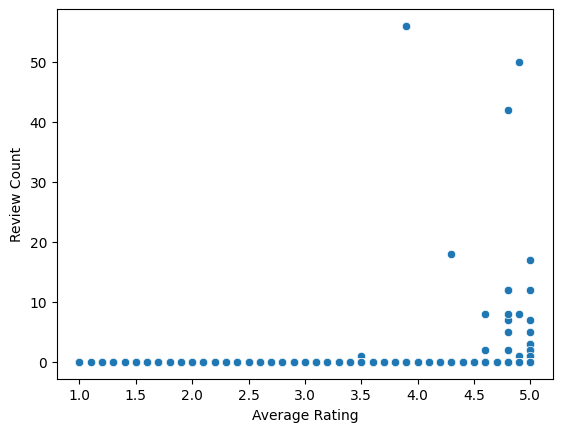

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the average rating and review count per podcast
rating_review_count = con.execute("""
SELECT podcasts.podcast_id, podcasts.title, podcasts.average_rating, COUNT(reviews.podcast_id) as review_count
FROM podcasts
LEFT JOIN reviews ON podcasts.podcast_id = reviews.podcast_id
GROUP BY podcasts.podcast_id, podcasts.title, podcasts.average_rating
""").fetch_df()

# Display the top 10 podcasts with the highest number of reviews
print("Top 10 podcasts with the highest number of reviews:")
print(rating_review_count.nlargest(10, 'review_count'))

# Calculate the correlation between average_rating and review_count
correlation = rating_review_count[['average_rating', 'review_count']].corr().iloc[0, 1]
print("\nCorrelation between average_rating and review_count: {:.2f}".format(correlation))

# Scatter plot of average_rating vs review_count
sns.scatterplot(data=rating_review_count, x='average_rating', y='review_count')
plt.xlabel('Average Rating')
plt.ylabel('Review Count')
plt.show()


In [253]:
categories = con.sql("select category, avg(rating) as average_rating, count(*) as num_reviews from reviews join categories using (podcast_id) group by 1 order by 3 desc")
categories

┌───────────────────────────────────┬───────────────────┬─────────────┐
│             category              │  average_rating   │ num_reviews │
│              varchar              │      double       │    int64    │
├───────────────────────────────────┼───────────────────┼─────────────┤
│ business                          │ 4.404580152671755 │         262 │
│ society-culture                   │ 4.554655870445344 │         247 │
│ comedy                            │ 4.863849765258216 │         213 │
│ health-fitness                    │ 4.066666666666666 │         210 │
│ education                         │ 4.041916167664671 │         167 │
│ arts                              │ 4.492857142857143 │         140 │
│ news                              │ 4.513761467889908 │         109 │
│ science                           │ 4.933333333333334 │         105 │
│ true-crime                        │              3.99 │         100 │
│ leisure                           │ 4.775510204081633 │       

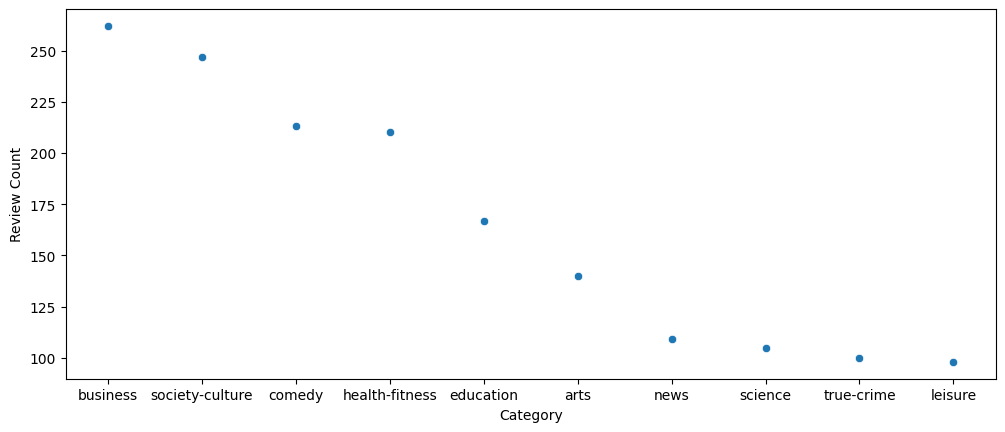

In [254]:
# Scatter plot of category vs number of reviews
f = plt.figure()
f.set_figwidth(12)
sns.scatterplot(data=categories.df().head(10), x='category', y='num_reviews')
plt.xlabel('Category')
plt.ylabel('Review Count')
plt.show()

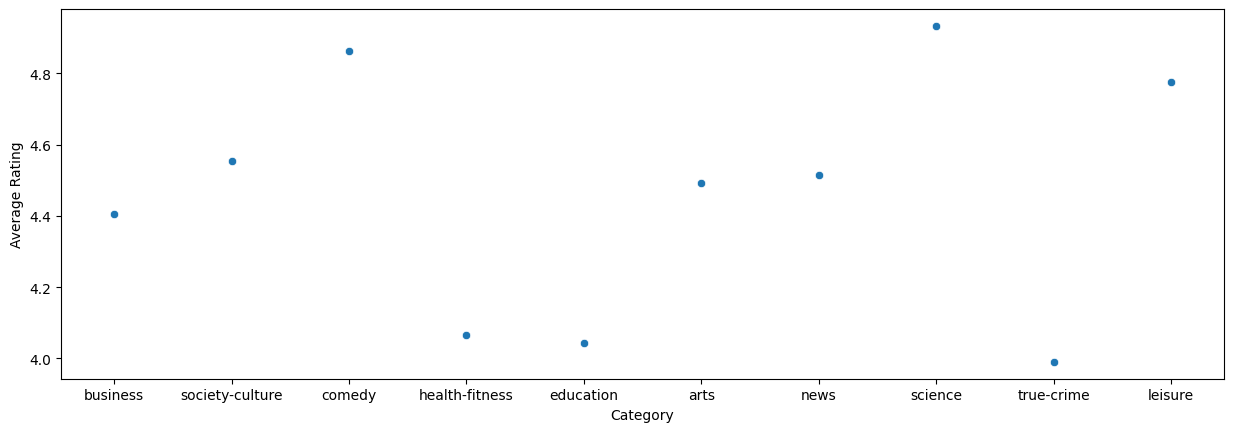

In [255]:
f = plt.figure()
f.set_figwidth(15)
sns.scatterplot(data=categories.df().sort_values('num_reviews',ascending=False).head(10), x='category', y='average_rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

In [256]:
# Calculate the correlation between average_rating and num_reviews
# negative association of columns
correlation = categories.df()[['average_rating', 'num_reviews']].corr(method='spearman').iloc[0, 1]
print("\nCorrelation between average_rating and num_reviews: {:.2f}".format(correlation))


Correlation between average_rating and num_reviews: -0.45
